In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Step 1- Understanding the Business Statement:
Credit risk refers to the uncertainty faced by an organization while lending money to an individual, business, or organization. Credit risk analysis is defined as a detailed review, and inspection done by the lending organization regarding the borrower about their financial background, modes of earning, and the capability to repay the borrowed credit.

CRA can be done on the basis of the "5C's of Credit":-
1)Character of the borrower- payment history will help us to know that.
2)Capacity of the borrower to repay- can be known from income, profession, wealth.
3)Collateral set by the borrower- value of the asset set as guarantee also determines the amount of loan to be given.
4)Capital- Overall wealth of the borrower
5)Conditions- refers to the the conditions set to the borrower like the loan amount provided, rate of interest, monthly repayment amount, calculated on the basis of the other 4 C's.

## So here we have to determine the major factors that help determine whether the borrower will be a defaulter or not.

### Step 2- Data Wrangling - Also known as Data Munging or Data Pre-processing, is the process of gathering, assessing and cleaning of raw data into a form suitable for analysis.

This involves 3 steps:-

#### i) Gathering of Data

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
cdf=pd.read_csv('application_data.csv') # cdf-current dataframe

#pdf=pd.read_csv('previous_application.csv') # pdf-previous dataframe

In [4]:
cdf.shape

(307511, 122)

In [5]:
cdf.info(verbose=True) # verbose=True displays all the columns info and this is needed as there are a lot of columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [6]:
cdf.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### Identifying the Target variable.

0    282686
1     24825
Name: TARGET, dtype: int64


Text(0.5, 1.0, 'Plot of Count of Defaulters and Non-Defaulters')

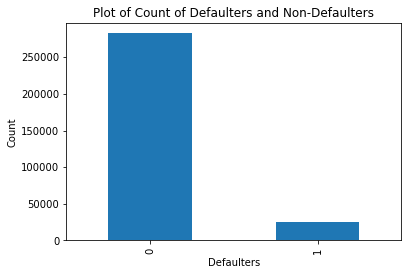

In [7]:
print(cdf.TARGET.value_counts())
cdf.TARGET.value_counts().plot(kind='bar')
plt.xlabel('Defaulters')
plt.ylabel('Count')
plt.title('Plot of Count of Defaulters and Non-Defaulters')

### This shows that the defaulters are around 8%. This is a highly imbalanced data in the ratio 92:8.
This insight is necessary for ML.

### ii) Find the Missing values

In [8]:
mv1=cdf.isnull().sum()
mv1.to_csv('missing_values2.csv')

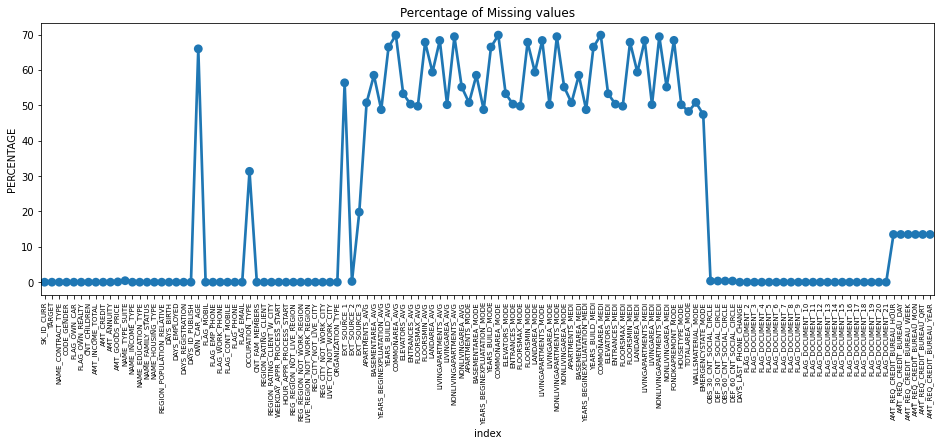

In [9]:
missing = pd.DataFrame(mv1*100/cdf.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)# plotting the percentage value graph
plt.xticks(rotation =90,fontsize =7) # This writes the x-axis labels vertically
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

#### So here we see that the maximum no of missing values are in the series related to the features of the building where the borrower is staying. Due to the large no of missing values these need to be dropped as they will not provide any insights.

In [10]:
cdf.drop(columns=cdf.columns[44:91],inplace=True) # Deleting the columns from index 44 to 90.

#### Then the owner's car age also has a lot of missing values,69%. Hence we will drop that as well.

In [11]:
cdf.drop(columns='OWN_CAR_AGE',inplace=True)

#### Then the Occupation type has around 25% missing but they are those values which correspond to the 'Pensioner' type,'State govt type', 'Commercialtype' in the Name_Income_type series. It's a lot of values to be replaced . ALso the Name_Income_type is appropriate for the occupation information. Hence we can drop the  Occupation type.

In [12]:
cdf.drop(columns='OCCUPATION_TYPE',inplace=True)

#### Then we see that the credit inquiries data has some 13% missing values but this data is important as A credit report possessing several hard inquiries within a short span of time can result in a decreased credit score for the borrower. On the same lines, the unusual number of hard inquiries can also be considered as the borrowers attempt to increase the existing credit. This can leave a negative impact resulting in credit lenders consider offering a higher credit limit to be a risky affair. Hence we will use the mean value to fill in the null values .

In [13]:
cdf.shape

(307511, 73)

In [14]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [15]:
cdf.iloc[:,67:].describe() # Since the no of columns have reduced the index positions of the columns have changed.

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [16]:
cdf["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna(0.006, inplace = True)
cdf['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

0

In [17]:
cdf["AMT_REQ_CREDIT_BUREAU_DAY"].fillna(0.007, inplace = True)
cdf['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum()

0

In [18]:
cdf["AMT_REQ_CREDIT_BUREAU_WEEK"].fillna(0.03, inplace = True)
cdf['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()

0

In [19]:
cdf["AMT_REQ_CREDIT_BUREAU_MON"].fillna(0.267, inplace = True)
cdf['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum()

0

In [20]:
cdf["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(0.26, inplace = True)
cdf['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()

0

In [21]:
cdf["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(1.89, inplace = True)
cdf['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum()

0

#### Then the Ext-source 1 has a  lot of null values ie around 57%, hence we will drop it as it willnot provide any insights with these many null values.

In [22]:
cdf.drop(columns='EXT_SOURCE_1',inplace=True)

#### The ext_source 2 and 3 have some missing values. Let's replace them by their mean value

In [23]:
cdf['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [24]:
cdf["EXT_SOURCE_2"].fillna(0.51, inplace = True)
cdf['EXT_SOURCE_2'].isnull().sum()

0

In [25]:
cdf['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [26]:
cdf["EXT_SOURCE_3"].fillna(0.51, inplace = True)
cdf['EXT_SOURCE_3'].isnull().sum()

0

#### SInce the 'Social circle series' and Amt_goods_Price' and 'Name_type_suite'  have very less missing values, we can ignore them by deleting the rows.

In [27]:
cdf = cdf.dropna(how='any',axis=0) 

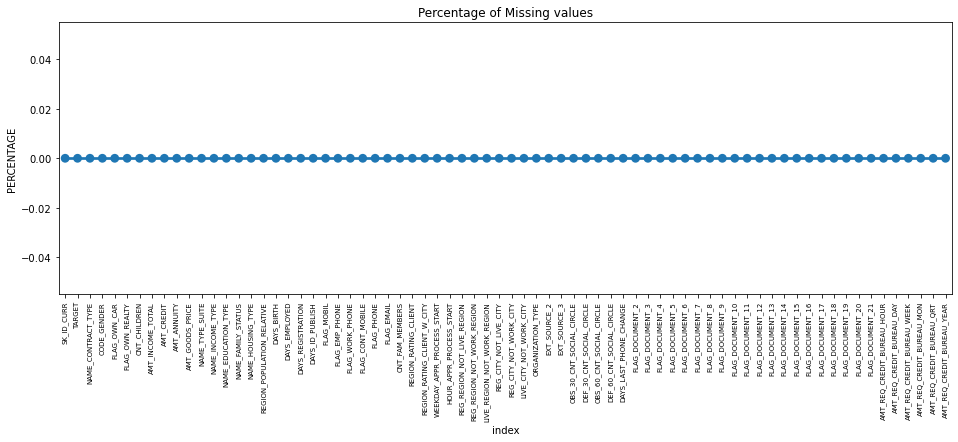

In [28]:
mv2=cdf.isnull().sum()
missing = pd.DataFrame(mv2*100/cdf.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)# plotting the percentage value graph
plt.xticks(rotation =90,fontsize =7) # This writes the x-axis labels vertically
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [29]:
cdf.shape

(305185, 72)

## Thus all the missing values of the current data file have been handled.

## iii) EDA
We have two types of features ie Numerical and Categorical. To access the effect of the features on the Target variable we need to conduct Univariate and Bivariate analysis for the categorical features and  Correlation matrix or Numerical distibution etc for the numerical features.

### Univariate Analysis:-

In [30]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305185 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   305185 non-null  int64  
 1   TARGET                       305185 non-null  int64  
 2   NAME_CONTRACT_TYPE           305185 non-null  object 
 3   CODE_GENDER                  305185 non-null  object 
 4   FLAG_OWN_CAR                 305185 non-null  object 
 5   FLAG_OWN_REALTY              305185 non-null  object 
 6   CNT_CHILDREN                 305185 non-null  int64  
 7   AMT_INCOME_TOTAL             305185 non-null  float64
 8   AMT_CREDIT                   305185 non-null  float64
 9   AMT_ANNUITY                  305185 non-null  float64
 10  AMT_GOODS_PRICE              305185 non-null  float64
 11  NAME_TYPE_SUITE              305185 non-null  object 
 12  NAME_INCOME_TYPE             305185 non-null  object 
 13 

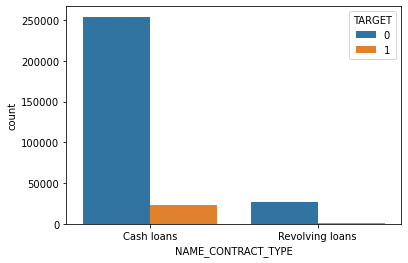

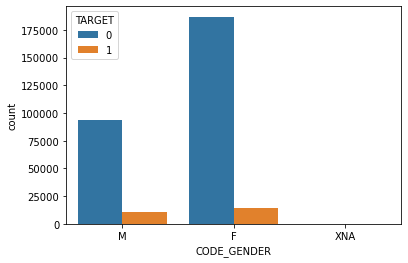

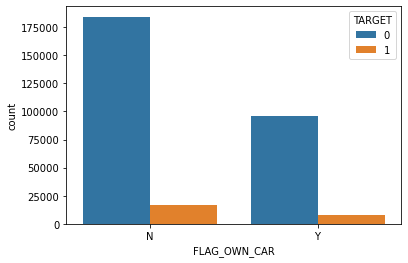

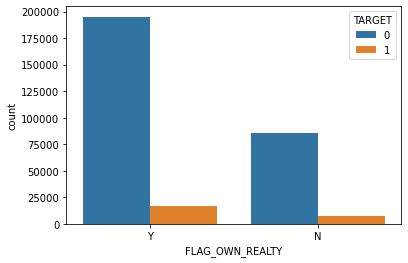

In [31]:
# There are multiple ways to iterate over columns in a dataframe- https://thispointer.com/pandas-loop-or-iterate-over-all-or-certain-columns-of-a-dataframe/
for i, predictor in enumerate(cdf.iloc[:,2:6]):# All rows, columns from 2nd to 5th
    # Taking all the columns except churn,total charges and Monthly charges
    plt.figure(i)
    sns.countplot(data=cdf, x=predictor, hue='TARGET')

In [32]:
cdf['CODE_GENDER'].value_counts()

F      200980
M      104201
XNA         4
Name: CODE_GENDER, dtype: int64

In [33]:
cdf.groupby(["CODE_GENDER","TARGET"]).size()

CODE_GENDER  TARGET
F            0         186878
             1          14102
M            0          93584
             1          10617
XNA          0              4
dtype: int64

In [34]:
print('Percentage of females exited in total female customer:-',round((14102/200980*100),2),'%')
print('Percentage of Males exited in total male customer:-',round((10617/104201*100),2),'%')

Percentage of females exited in total female customer:- 7.02 %
Percentage of Males exited in total male customer:- 10.19 %


## From the above graphs we realize that most defaulters are the ones with
### 1)Contract type- Cash loans
### 2)Major applicants are Females(66%), but comparitvely male are mostly defaulters(10.2%)
### 3)Car- Majority of Defaulters do not own a car
### 4)House- Majority of Defaulters do own a house

In [35]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305185 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   305185 non-null  int64  
 1   TARGET                       305185 non-null  int64  
 2   NAME_CONTRACT_TYPE           305185 non-null  object 
 3   CODE_GENDER                  305185 non-null  object 
 4   FLAG_OWN_CAR                 305185 non-null  object 
 5   FLAG_OWN_REALTY              305185 non-null  object 
 6   CNT_CHILDREN                 305185 non-null  int64  
 7   AMT_INCOME_TOTAL             305185 non-null  float64
 8   AMT_CREDIT                   305185 non-null  float64
 9   AMT_ANNUITY                  305185 non-null  float64
 10  AMT_GOODS_PRICE              305185 non-null  float64
 11  NAME_TYPE_SUITE              305185 non-null  object 
 12  NAME_INCOME_TYPE             305185 non-null  object 
 13 

In [36]:
## The series Cnt_children and Cnt_family members can be merged into a single series Cnt_family, so since children come in the family count, we can drop the children column
cdf.drop(columns='CNT_CHILDREN',inplace=True)

### The Amt_Income, AMt_credit, Amt_Annuity etc have a large no of values and hence need to be grouped into intervals

In [37]:
cdf['AMT_INCOME_TOTAL'].describe()

count    3.051850e+05
mean     1.686140e+05
std      2.376652e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.458000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [38]:
print(cdf[cdf.AMT_INCOME_TOTAL==1.170000e+08].count())

SK_ID_CURR                    1
TARGET                        1
NAME_CONTRACT_TYPE            1
CODE_GENDER                   1
FLAG_OWN_CAR                  1
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     1
AMT_REQ_CREDIT_BUREAU_WEEK    1
AMT_REQ_CREDIT_BUREAU_MON     1
AMT_REQ_CREDIT_BUREAU_QRT     1
AMT_REQ_CREDIT_BUREAU_YEAR    1
Length: 71, dtype: int64


#### This shows that the 1.17x10^8 is an outlier but DOES NOT AFFECT THE Mean value and the count shows that there is only a single such value. 

From the above details , we see that maximum people(upto 75%) are in the range of income below 2,02,500, so we will create manual bins ie (25k-1lac), (1-2 lac),(2-3 lac), (3-5 lac), (5-10 lac), (10 lac above)

In [39]:
cdf['Amt_Income_grp']=''
cdf.loc[(cdf['AMT_INCOME_TOTAL']<=25000),'Amt_Income_grp']='[0-25k]'
cdf.loc[(cdf['AMT_INCOME_TOTAL']>25000) & (cdf['AMT_INCOME_TOTAL']<=100000),'Amt_Income_grp']='[25k-1lac]'
cdf.loc[(cdf['AMT_INCOME_TOTAL']>100000) & (cdf['AMT_INCOME_TOTAL']<=200000),'Amt_Income_grp']='[1lac-2lac]'
cdf.loc[(cdf['AMT_INCOME_TOTAL']>200000) & (cdf['AMT_INCOME_TOTAL']<=300000),'Amt_Income_grp']='[2lac-3lac]'
cdf.loc[(cdf['AMT_INCOME_TOTAL']>300000) & (cdf['AMT_INCOME_TOTAL']<=500000),'Amt_Income_grp']='[3lac-5lac]'
cdf.loc[(cdf['AMT_INCOME_TOTAL']>500000) & (cdf['AMT_INCOME_TOTAL']<=1000000),'Amt_Income_grp']='[5lac-10lac]'
cdf.loc[(cdf['AMT_INCOME_TOTAL']>1000000),'Amt_Income_grp']='[ > 10lac]'



In [40]:
cdf['AMT_CREDIT'].describe()

count    3.051850e+05
mean     5.992816e+05
std      4.020170e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.147775e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

From the above details , we see that maximum people(upto 75%) are in the range of credit above 8,00,000, so we will create manual bins ie (25k-1lac), (1-3 lac),(3-5 lac), (5-8 lac), (8-10 lac), (10 lac above)

In [41]:
cdf['Amt_Credit_grp']=''
cdf.loc[(cdf['AMT_CREDIT']<=25000),'Amt_Credit_grp']='[0-25k]'
cdf.loc[(cdf['AMT_CREDIT']>25000) & (cdf['AMT_CREDIT']<=100000),'Amt_Credit_grp']='[25k-1lac]'
cdf.loc[(cdf['AMT_CREDIT']>100000) & (cdf['AMT_CREDIT']<=300000),'Amt_Credit_grp']='[1lac-3lac]'
cdf.loc[(cdf['AMT_CREDIT']>300000) & (cdf['AMT_CREDIT']<=500000),'Amt_Credit_grp']='[3lac-5lac]'
cdf.loc[(cdf['AMT_CREDIT']>500000) & (cdf['AMT_CREDIT']<=800000),'Amt_Credit_grp']='[5lac-8lac]'
cdf.loc[(cdf['AMT_CREDIT']>800000) & (cdf['AMT_CREDIT']<=1000000),'Amt_Credit_grp']='[8lac-10lac]'

cdf.loc[(cdf['AMT_CREDIT']>1000000),'Amt_Credit_grp']='[ > 10lac]'

In [42]:
cdf['AMT_ANNUITY'].describe()

count    305185.000000
mean      27136.759613
std       14476.069729
min        1615.500000
25%       16573.500000
50%       24939.000000
75%       34618.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [43]:
cdf['Amt_Annuity_grp']=''
cdf.loc[(cdf['AMT_ANNUITY']<=5000),'Amt_Annuity_grp']='[0-5k]'
cdf.loc[(cdf['AMT_ANNUITY']>5000) & (cdf['AMT_ANNUITY']<=10000),'Amt_Annuity_grp']='[5k-10k]'
cdf.loc[(cdf['AMT_ANNUITY']>10000) & (cdf['AMT_ANNUITY']<=15000),'Amt_Annuity_grp']='[10k-15k]'
cdf.loc[(cdf['AMT_ANNUITY']>15000) & (cdf['AMT_ANNUITY']<=20000),'Amt_Annuity_grp']='[15k-20k]'
cdf.loc[(cdf['AMT_ANNUITY']>20000) & (cdf['AMT_ANNUITY']<=25000),'Amt_Annuity_grp']='[20k-25k]'
cdf.loc[(cdf['AMT_ANNUITY']>25000) & (cdf['AMT_ANNUITY']<=30000),'Amt_Annuity_grp']='[25k-30k]'
cdf.loc[(cdf['AMT_ANNUITY']>30000) & (cdf['AMT_ANNUITY']<=35000),'Amt_Annuity_grp']='[30k-35k]'
cdf.loc[(cdf['AMT_ANNUITY']>35000) & (cdf['AMT_ANNUITY']<=40000),'Amt_Annuity_grp']='[35k-40k]'
cdf.loc[(cdf['AMT_ANNUITY']>40000) & (cdf['AMT_ANNUITY']<=50000),'Amt_Annuity_grp']='[40k-50k]'
cdf.loc[(cdf['AMT_ANNUITY']>50000) & (cdf['AMT_ANNUITY']<=75000),'Amt_Annuity_grp']='[50k-75k]'
cdf.loc[(cdf['AMT_ANNUITY']>75000) & (cdf['AMT_ANNUITY']<=100000),'Amt_Annuity_grp']='[75k-1lac]'
cdf.loc[(cdf['AMT_ANNUITY']>100000) ,'Amt_Annuity_grp']='[> 1lac]'


In [44]:
cdf['AMT_GOODS_PRICE'].describe()

count    3.051850e+05
mean     5.382271e+05
std      3.689286e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [45]:
cdf['Amt_Goods_grp']=''
cdf.loc[(cdf['AMT_GOODS_PRICE']<=45000),'Amt_Goods_grp']='[0-45k]'
cdf.loc[(cdf['AMT_GOODS_PRICE']>45000) & (cdf['AMT_ANNUITY']<=100000),'Amt_Goods_grp']='[45k-1lac]'
cdf.loc[(cdf['AMT_GOODS_PRICE']>100000) & (cdf['AMT_GOODS_PRICE']<=200000),'Amt_Goods_grp']='[1lac-2lac]'
cdf.loc[(cdf['AMT_GOODS_PRICE']>200000) & (cdf['AMT_GOODS_PRICE']<=300000),'Amt_Goods_grp']='[2lac-3lac]'
cdf.loc[(cdf['AMT_GOODS_PRICE']>300000) & (cdf['AMT_GOODS_PRICE']<=400000),'Amt_Goods_grp']='[3lac-4lac]'
cdf.loc[(cdf['AMT_GOODS_PRICE']>400000) & (cdf['AMT_GOODS_PRICE']<=500000),'Amt_Goods_grp']='[4lac-5lac]'
cdf.loc[(cdf['AMT_GOODS_PRICE']>500000) & (cdf['AMT_GOODS_PRICE']<=600000),'Amt_Goods_grp']='[5lac-6lac]'
cdf.loc[(cdf['AMT_GOODS_PRICE']>600000) & (cdf['AMT_GOODS_PRICE']<=700000),'Amt_Goods_grp']='[6lac-7lac]'
cdf.loc[(cdf['AMT_GOODS_PRICE']>700000) & (cdf['AMT_GOODS_PRICE']<=800000),'Amt_Goods_grp']='[7lac-8lac]'
cdf.loc[(cdf['AMT_GOODS_PRICE']>800000) & (cdf['AMT_GOODS_PRICE']<=1000000),'Amt_Goods_grp']='[8lac-10lac]'
cdf.loc[(cdf['AMT_GOODS_PRICE']>1000000) & (cdf['AMT_GOODS_PRICE']<=1500000),'Amt_Goods_grp']='[10lac-15lac]'
cdf.loc[(cdf['AMT_GOODS_PRICE']>1500000) & (cdf['AMT_GOODS_PRICE']<=2000000),'Amt_Goods_grp']='[15lac-20lac]'
cdf.loc[(cdf['AMT_GOODS_PRICE']>2000000) ,'Amt_Goods_grp']='[> 20lac]'


In [46]:
cdf.drop(columns=['AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY','AMT_INCOME_TOTAL'],inplace=True)

### To find the position of the newly added columns.

In [47]:
print(cdf.columns.get_loc('Amt_Goods_grp'))#- For single column

70


In [48]:
# For getting the position of multiple columns.
cols_to_find=['Amt_Goods_grp','Amt_Income_grp','Amt_Annuity_grp','Amt_Credit_grp']
[cdf.columns.get_loc(col) for col in cols_to_find]


[70, 67, 69, 68]

### Plotting the graphs for a series of columns

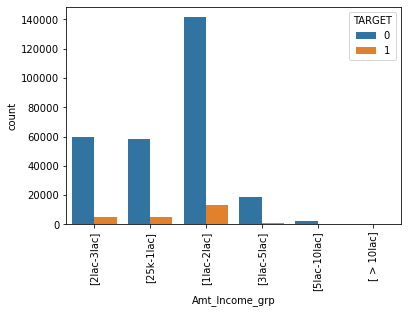

Amt_Income_grp  TARGET
[ > 10lac]      0            230
                1             13
[1lac-2lac]     0         141583
                1          13267
[25k-1lac]      0          58038
                1           5201
[2lac-3lac]     0          59762
                1           4902
[3lac-5lac]     0          18599
                1           1203
[5lac-10lac]    0           2254
                1            133
dtype: int64


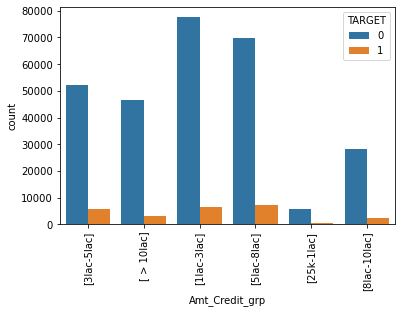

Amt_Credit_grp  TARGET
[ > 10lac]      0         46711
                1          2921
[1lac-3lac]     0         77605
                1          6429
[25k-1lac]      0          5673
                1           331
[3lac-5lac]     0         52145
                1          5771
[5lac-8lac]     0         69979
                1          7071
[8lac-10lac]    0         28353
                1          2196
dtype: int64


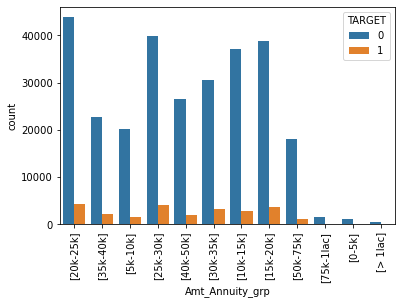

Amt_Annuity_grp  TARGET
[0-5k]           0          1075
                 1            63
[10k-15k]        0         37061
                 1          2765
[15k-20k]        0         38910
                 1          3616
[20k-25k]        0         43910
                 1          4142
[25k-30k]        0         39805
                 1          4098
[30k-35k]        0         30439
                 1          3085
[35k-40k]        0         22651
                 1          2160
[40k-50k]        0         26520
                 1          2005
[50k-75k]        0         17995
                 1          1153
[5k-10k]         0         20203
                 1          1565
[75k-1lac]       0          1407
                 1            57
[> 1lac]         0           490
                 1            10
dtype: int64


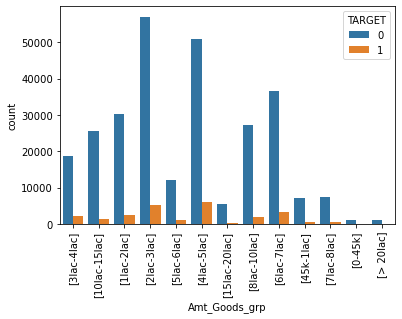

Amt_Goods_grp  TARGET
[0-45k]        0          1115
               1            55
[10lac-15lac]  0         25565
               1          1433
[15lac-20lac]  0          5521
               1           252
[1lac-2lac]    0         30182
               1          2520
[2lac-3lac]    0         56995
               1          5260
[3lac-4lac]    0         18814
               1          2217
[45k-1lac]     0          7067
               1           471
[4lac-5lac]    0         50789
               1          5892
[5lac-6lac]    0         12037
               1           974
[6lac-7lac]    0         36665
               1          3169
[7lac-8lac]    0          7512
               1           536
[8lac-10lac]   0         27170
               1          1912
[> 20lac]      0          1034
               1            28
dtype: int64


In [49]:
for i, predictor in enumerate(cdf.iloc[:,67:71]):# All rows, columns from 7nd to 10th
    plt.figure(i)
    sns.countplot(data=cdf, x=predictor, hue='TARGET')
    plt.xticks(rotation=90)
    plt.show()
    print(cdf.groupby([predictor,"TARGET"]).size())


## From the above graphs we can conclude that the defaulters:
## 1) Are in the income grp of 25k-3 lac with the maximum (12500/24719=50%) 50% in the 1-2 lac range.
## 2) mostly have a credit of 1 lac-8lac.
## 3) Have Annuity in the range of 10-50k with maximum in the range 15-35k.
##  4)Have purchased goods of mostly 1-7 lac.

### Next let's find the effect of Income type, Education, Family status and Housing type on the repayment ability of a customer.

In [50]:
# fINDING THE POSITION OF THE COLUMNS TO PLOT
cols_to_find=['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
[cdf.columns.get_loc(col) for col in cols_to_find]

[7, 8, 9, 10]

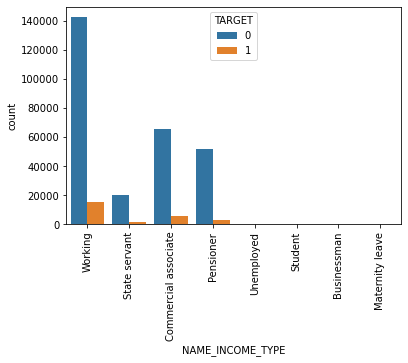

NAME_INCOME_TYPE      TARGET
Businessman           0             10
Commercial associate  0          65603
                      1           5331
Maternity leave       0              3
                      1              2
Pensioner             0          52029
                      1           2966
State servant         0          20310
                      1           1241
Student               0             17
Unemployed            0             11
                      1              8
Working               0         142483
                      1          15171
dtype: int64


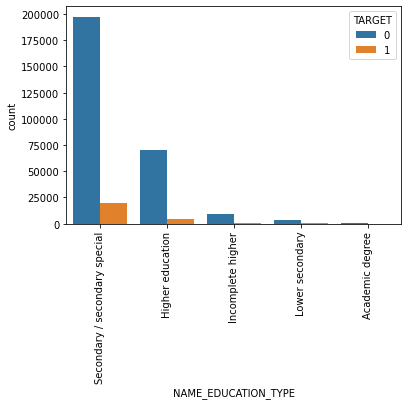

NAME_EDUCATION_TYPE            TARGET
Academic degree                0            160
                               1              3
Higher education               0          69977
                               1           3984
Incomplete higher              0           9328
                               1            867
Lower secondary                0           3389
                               1            415
Secondary / secondary special  0         197612
                               1          19450
dtype: int64


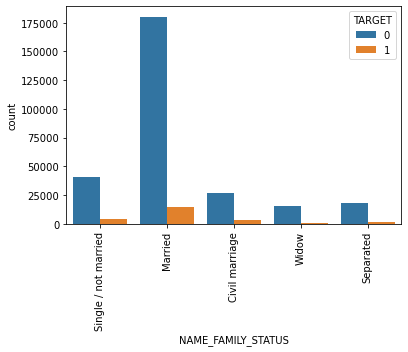

NAME_FAMILY_STATUS    TARGET
Civil marriage        0          26617
                      1           2947
Married               0         180259
                      1          14786
Separated             0          18012
                      1           1611
Single / not married  0          40538
                      1           4441
Widow                 0          15040
                      1            934
dtype: int64


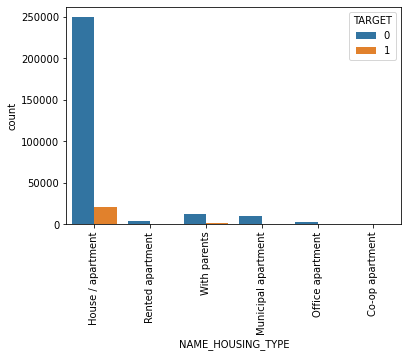

NAME_HOUSING_TYPE    TARGET
Co-op apartment      0           1019
                     1             88
House / apartment    0         249618
                     1          21182
Municipal apartment  0          10164
                     1            950
Office apartment     0           2421
                     1            170
Rented apartment     0           4243
                     1            597
With parents         0          13001
                     1           1732
dtype: int64


In [51]:
for i, predictor in enumerate(cdf.iloc[:,7:11]):# All rows, columns from 7nd to 10th
    plt.figure(i)
    sns.countplot(data=cdf, x=predictor, hue='TARGET')
    plt.xticks(rotation=90)
    plt.show()
    print(cdf.groupby([predictor,"TARGET"]).size())


CNT_FAM_MEMBERS  TARGET
1.0              0          61586
                 1           5653
2.0              0         145275
                 1          11953
3.0              0          47630
                 1           4588
4.0              0          22394
                 1           2128
5.0              0           3124
                 1            327
6.0              0            351
                 1             55
7.0              0             75
                 1              6
8.0              0             14
                 1              6
9.0              0              6
10.0             0              2
                 1              1
11.0             1              1
12.0             0              2
13.0             1              1
14.0             0              2
15.0             0              1
16.0             0              2
20.0             0              2
dtype: int64


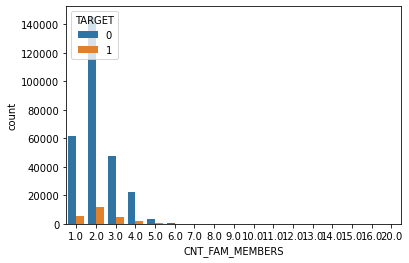

In [52]:
sns.countplot(data=cdf,x='CNT_FAM_MEMBERS',hue='TARGET')
print(cdf.groupby(['CNT_FAM_MEMBERS',"TARGET"]).size())

## From the above graphs we can conclude that considering the number of applicants, the defaulters are :
## 1) Maternity-40%, Unemployed-40%, Working-9%
## 2) Lower Secondary-11%, Secondary/Secondary special-9%, Incomplete higher-9%
## 3) Civil marriage-10%,married-7.6%, separated-8.2%, single-9.87%,widow-6%
## 4) With Parents-12%,Rented Apartment-12%,House/Apartment-8%,co-op apartment-8%, Muncipal apartments-8.6%, office apartment-7%,
## 5) 1 family member- 8.4%, 2 family members-7.6%, 3-8.8%, 4-8.7%, 5-9.47%,6-13.5%,
## 7-7.5%, 8-30%, 10-50%, 11,13-100%, 12,14,15,16,20- 0%


### Lets find correlation of the other numerical series with the target  variable

### To find the correlation of all columns with only the Target series, we can use the corrwith().

In [53]:
corr_val=cdf.corrwith(cdf['TARGET']) #- Here we are using the original file cdf so that Nan does not come as above.
#corr_val.to_csv('corr_values.csv')
print(corr_val)

SK_ID_CURR                    -0.002171
TARGET                         1.000000
REGION_POPULATION_RELATIVE    -0.036908
DAYS_BIRTH                     0.078726
DAYS_EMPLOYED                 -0.045224
DAYS_REGISTRATION              0.042199
DAYS_ID_PUBLISH                0.051531
FLAG_MOBIL                          NaN
FLAG_EMP_PHONE                 0.046278
FLAG_WORK_PHONE                0.028379
FLAG_CONT_MOBILE               0.000258
FLAG_PHONE                    -0.023975
FLAG_EMAIL                    -0.001779
CNT_FAM_MEMBERS                0.009243
REGION_RATING_CLIENT           0.058849
REGION_RATING_CLIENT_W_CITY    0.060852
HOUR_APPR_PROCESS_START       -0.023932
REG_REGION_NOT_LIVE_REGION     0.005625
REG_REGION_NOT_WORK_REGION     0.006988
LIVE_REGION_NOT_WORK_REGION    0.002851
REG_CITY_NOT_LIVE_CITY         0.044675
REG_CITY_NOT_WORK_CITY         0.050990
LIVE_CITY_NOT_WORK_CITY        0.032387
EXT_SOURCE_2                  -0.160649
EXT_SOURCE_3                  -0.157680


In [54]:
cdf['age']=-(cdf['DAYS_BIRTH']/365)

In [55]:
cdf['Employed_years']=-(cdf['DAYS_EMPLOYED']/365)

In [56]:
cdf['Registrn_time']=-(cdf['DAYS_REGISTRATION']/365)

In [57]:
cdf['Id_Publish_time']=-(cdf['DAYS_ID_PUBLISH']/365)

In [58]:
cdf['age'].describe()

count    305185.000000
mean         43.949726
std          11.952059
min          20.517808
25%          34.027397
50%          43.167123
75%          53.931507
max          69.120548
Name: age, dtype: float64

In [59]:
cdf['age_grp']=''
cdf.loc[(cdf['age']<=25),'age_grp']='[18-25]'
cdf.loc[(cdf['age']>25) & (cdf['age']<=35),'age_grp']='[25-35]'
cdf.loc[(cdf['age']>35) & (cdf['age']<=45),'age_grp']='[35-45]'
cdf.loc[(cdf['age']>45) & (cdf['age']<=55),'age_grp']='[45-55]'
cdf.loc[(cdf['age']>55) & (cdf['age']<=65),'age_grp']='[55-65]'
cdf.loc[(cdf['age']>65) ,'age_grp']='[> 65]'

In [60]:
cdf['Employed_years'].describe()

count    305185.000000
mean       -175.000523
std         387.197985
min       -1000.665753
25%           0.791781
50%           3.326027
75%           7.564384
max          49.073973
Name: Employed_years, dtype: float64

In [61]:
cdf['employed_yr_grp']=''
cdf.loc[(cdf['Employed_years']<=1),'employed_yr_grp']='[0-1]'
cdf.loc[(cdf['Employed_years']>1) & (cdf['Employed_years']<=3),'employed_yr_grp']='[1-3]'
cdf.loc[(cdf['Employed_years']>3) & (cdf['Employed_years']<=5),'employed_yr_grp']='[3-5]'
cdf.loc[(cdf['Employed_years']>5) & (cdf['Employed_years']<=8),'employed_yr_grp']='[5-8]'
cdf.loc[(cdf['Employed_years']>8) & (cdf['Employed_years']<=10),'employed_yr_grp']='[8-10]'
cdf.loc[(cdf['Employed_years']>10) & (cdf['Employed_years']<=15),'employed_yr_grp']='[10-15]'
cdf.loc[(cdf['Employed_years']>15) ,'employed_yr_grp']='[>15]'


In [62]:
cdf['Registrn_time'].describe()

count    305185.000000
mean         13.665423
std           9.650254
min          -0.000000
25%           5.515068
50%          12.345205
75%          20.493151
max          67.594521
Name: Registrn_time, dtype: float64

In [63]:
cdf['Registrn_time_grp']=''
cdf.loc[(cdf['Registrn_time']<=1),'Registrn_time_grp']='[0-1]'
cdf.loc[(cdf['Registrn_time']>1) & (cdf['Registrn_time']<=5),'Registrn_time_grp']='[1-5]'
cdf.loc[(cdf['Registrn_time']>5) & (cdf['Registrn_time']<=10),'Registrn_time_grp']='[5-10]'
cdf.loc[(cdf['Registrn_time']>10) & (cdf['Registrn_time']<=15),'Registrn_time_grp']='[10-15]'
cdf.loc[(cdf['Registrn_time']>15) & (cdf['Registrn_time']<=20),'Registrn_time_grp']='[15-20]'
cdf.loc[(cdf['Registrn_time']>20) & (cdf['Registrn_time']<=25),'Registrn_time_grp']='[20-25]'
cdf.loc[(cdf['Registrn_time']>25) ,'Registrn_time_grp']='[>25]'

In [64]:
cdf['Id_Publish_time'].describe()

count    305185.000000
mean          8.204517
std           4.135193
min          -0.000000
25%           4.712329
50%           8.917808
75%          11.778082
max          19.717808
Name: Id_Publish_time, dtype: float64

In [65]:
cdf['Id_published_grp']=''
cdf.loc[(cdf['Id_Publish_time']<=1),'Id_published_grp']='[0-1]'
cdf.loc[(cdf['Id_Publish_time']>1) & (cdf['Id_Publish_time']<=5),'Id_published_grp']='[1-5]'
cdf.loc[(cdf['Id_Publish_time']>5) & (cdf['Id_Publish_time']<=10),'Id_published_grp']='[5-10]'
cdf.loc[(cdf['Id_Publish_time']>10) & (cdf['Id_Publish_time']<=15),'Id_published_grp']='[10-15]'
cdf.loc[(cdf['Id_Publish_time']>15) & (cdf['Id_Publish_time']<=20),'Id_published_grp']='[15-20]'
cdf.loc[(cdf['Id_Publish_time']>20) ,'Id_published_grp']='[>25]'

In [66]:
cdf.drop(columns=['Id_Publish_time','Registrn_time','Employed_years','age'],inplace=True)

In [67]:
col_to_find=['Id_published_grp','Registrn_time_grp','employed_yr_grp','age_grp']
[cdf.columns.get_loc(col) for col in col_to_find]

[74, 73, 72, 71]

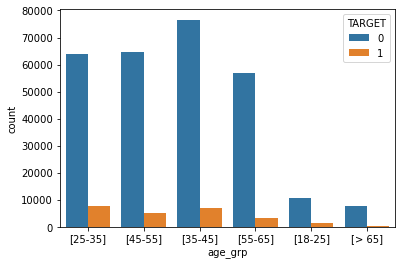

age_grp  TARGET
[18-25]  0         10520
         1          1487
[25-35]  0         64004
         1          7681
[35-45]  0         76584
         1          7061
[45-55]  0         64685
         1          4927
[55-65]  0         56926
         1          3262
[> 65]   0          7747
         1           301
dtype: int64


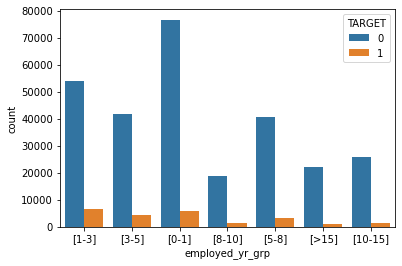

employed_yr_grp  TARGET
[0-1]            0         76688
                 1          6034
[1-3]            0         54191
                 1          6774
[10-15]          0         25736
                 1          1584
[3-5]            0         41986
                 1          4509
[5-8]            0         40728
                 1          3425
[8-10]           0         18930
                 1          1346
[>15]            0         22207
                 1          1047
dtype: int64


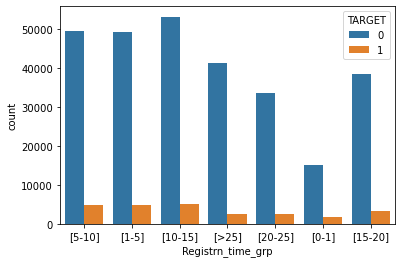

Registrn_time_grp  TARGET
[0-1]              0         15078
                   1          1656
[1-5]              0         49351
                   1          4886
[10-15]            0         53196
                   1          5080
[15-20]            0         38432
                   1          3265
[20-25]            0         33626
                   1          2577
[5-10]             0         49463
                   1          4738
[>25]              0         41320
                   1          2517
dtype: int64


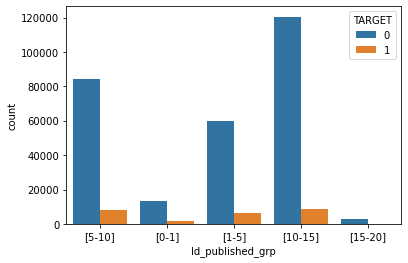

Id_published_grp  TARGET
[0-1]             0          13293
                  1           1551
[1-5]             0          59839
                  1           6484
[10-15]           0         120436
                  1           8713
[15-20]           0           2695
                  1            160
[5-10]            0          84203
                  1           7811
dtype: int64


In [68]:
for i, predictor in enumerate(cdf.iloc[:,71:]):# All rows, columns from 71st to 75th
    plt.figure(i)
    sns.countplot(data=cdf, x=predictor, hue='TARGET')
    plt.show()
    print(cdf.groupby([predictor,"TARGET"]).size())

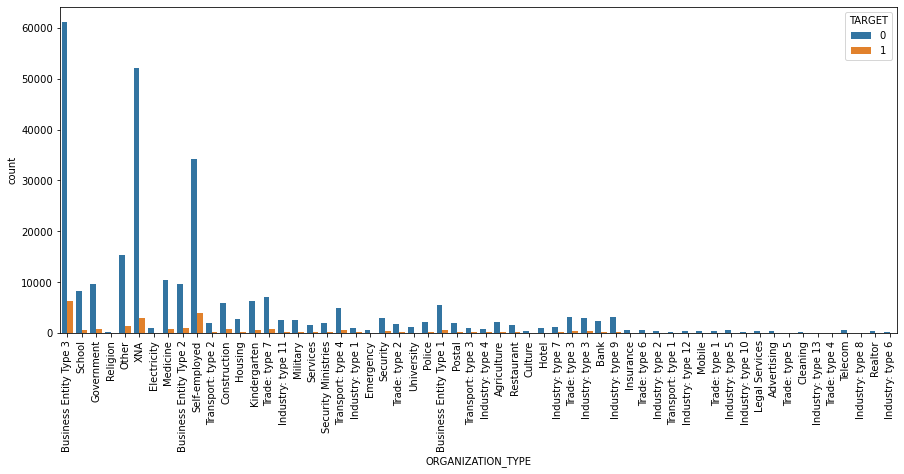

ORGANIZATION_TYPE  TARGET
Advertising        0           394
                   1            35
Agriculture        0          2187
                   1           255
Bank               0          2330
                             ...  
Transport: type 4  1           499
University         0          1246
                   1            65
XNA                0         52032
                   1          2974
Length: 116, dtype: int64


In [69]:
from matplotlib import pyplot # For sizing the countplot
a4_dims = (15, 6)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(data=cdf, x='ORGANIZATION_TYPE',hue='TARGET',ax=ax)

plt.xticks(rotation=90)
plt.show()
org_type=cdf.groupby(['ORGANIZATION_TYPE',"TARGET"]).size()
org_type.to_csv('org_type_values.csv')
print(org_type)


## From the graphs we can conclude that defaulters:
## 1) Age_grp:-[18-25]-12.4%, [25-35]-10.7%, [35-45]-8.5%, [45-55]-7.1%, [55-65]-5.4%, >65-3.7%
## 2)Employed:-[0-1]-7.3%, [1-3]-11.1%, [ 3-5 years]-9.8%, [ 5-8 years]-7.8% and rest are >8years-6%
## 3)Almost 67% (16360/24719) have their registration changed within 1-15 years.
## 4) Almost 67 %(16748/24719) have changed their Id's min 5 years before the application date.
## 5) Among the applicants, defaulters in Industry type 13 are the highest(13%).

### Correlation is a way to determine if two variables in a dataset are related in any way. Correlations have many real-world applications. We can see if using certain search terms are correlated to views on youtube. Or, we can see if ads are correlated to sales. When building machine learning models correlations are an important factor in determining features. Not only can this help us to see which features are linear related, but if features are strongly correlated we can remove them to prevent duplicating information.

### In a Heatmap, each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.

<AxesSubplot:>

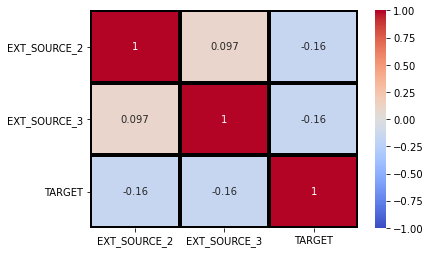

In [70]:
source=cdf[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].copy()
sns.heatmap(source.corr(),annot=True,vmin=-1, vmax=1, center= 0,cmap='coolwarm',linewidths=3,linecolor='black')

 Here we can see that the Exr+source_2 and source3 almost have the same correlation (-0.16,-0.18) to the Target variable. Hence we can say that the effect of Ext_Source_2 and Ext_source_3 on the Target variale is same.

In [71]:
cdf['EXT_SOURCE_2'].describe()

count    3.051850e+05
mean     5.142112e-01
std      1.909198e-01
min      8.173617e-08
25%      3.926764e-01
50%      5.653275e-01
75%      6.633290e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [72]:
cdf['EXT_SOURCE_3'].describe()

count    305185.000000
mean          0.510678
std           0.174465
min           0.000527
25%           0.417100
50%           0.510000
75%           0.636376
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [73]:
cdf['EXT_SOURCE_3'].value_counts()

0.510000    60477
0.746300     1446
0.713631     1302
0.694093     1268
0.670652     1181
            ...  
0.018924        1
0.017506        1
0.020455        1
0.014556        1
0.026921        1
Name: EXT_SOURCE_3, Length: 815, dtype: int64

In [74]:
ndf=cdf.loc[cdf['TARGET']==1] # Dataframe with features of Target=1
ndf.shape

(24719, 75)

In [75]:
### I am not getting a plot with labels when I am doing the Ext_source_grp
ndf['Ext_source_grp']=''
ndf.loc[(ndf['EXT_SOURCE_3']<=0.1),'Ext_source-grp']='[0-0.1]'
ndf.loc[(ndf['EXT_SOURCE_3']>0.1) & (ndf['EXT_SOURCE_3']<=0.2),'Ext_source-grp']='[0.1-0.2]'
ndf.loc[(ndf['EXT_SOURCE_3']>0.2) & (ndf['EXT_SOURCE_3']<=0.3),'Ext_source-grp']='[0.2-0.3]'
ndf.loc[(ndf['EXT_SOURCE_3']>0.3) & (ndf['EXT_SOURCE_3']<=0.4),'Ext_source-grp']='[0.3-0.4]'
ndf.loc[(ndf['EXT_SOURCE_3']>0.4) & (ndf['EXT_SOURCE_3']<=0.5),'Ext_source-grp']='[0.4-0.5]'
ndf.loc[(ndf['EXT_SOURCE_3']>0.5) & (ndf['EXT_SOURCE_3']<=0.6),'Ext_source-grp']='[0.5-0.6]'
ndf.loc[(ndf['EXT_SOURCE_3']>0.6) & (ndf['EXT_SOURCE_3']<=0.7),'Ext_source-grp']='[0.6-0.7]'
ndf.loc[(ndf['EXT_SOURCE_3']>0.7) & (ndf['EXT_SOURCE_3']<=0.8),'Ext_source-grp']='[0.7-0.8]'
ndf.loc[(ndf['EXT_SOURCE_3']>0.8) & (ndf['EXT_SOURCE_3']<=0.9),'Ext_source-grp']='[0.8-0.9]'
ndf.loc[(ndf['EXT_SOURCE_3']>0.9) & (ndf['EXT_SOURCE_3']<=1),'Ext_source-grp']='[0.9-1]'

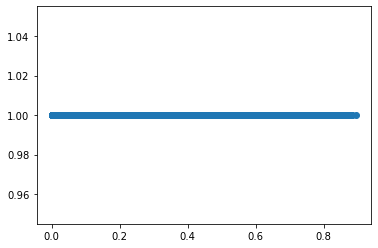

In [76]:
plt.scatter(ndf['EXT_SOURCE_3'], ndf['TARGET'])

<AxesSubplot:xlabel='EXT_SOURCE_3', ylabel='count'>

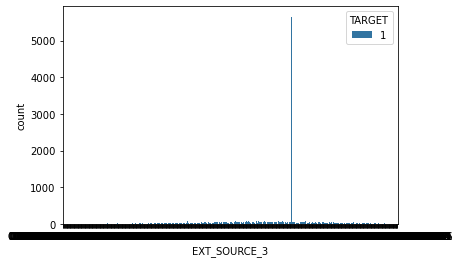

In [77]:
sns.countplot(data=ndf,x='EXT_SOURCE_3',hue='TARGET')

## Communication details given:

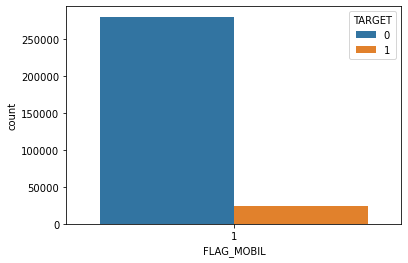

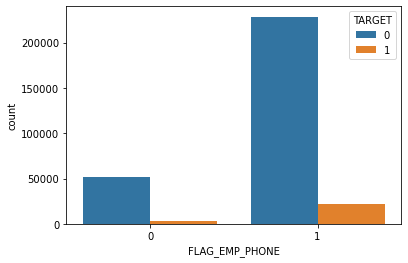

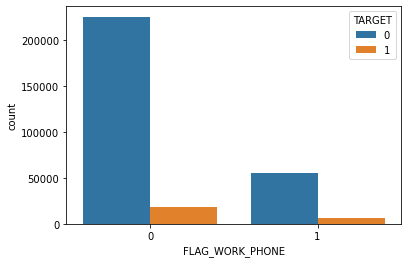

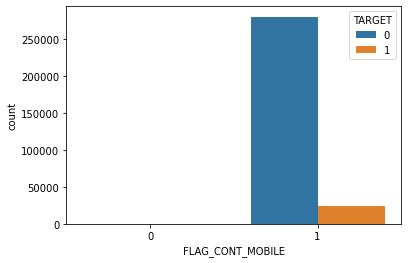

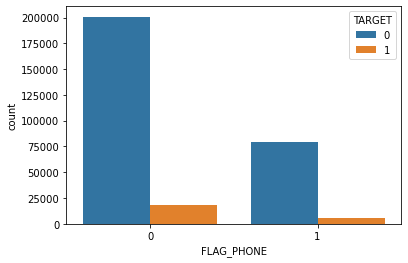

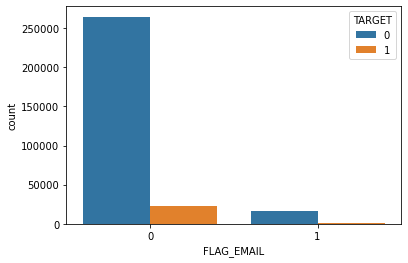

In [78]:
for i, predictor in enumerate(cdf.iloc[:,16:22]):# All rows, columns from 16nd to 21st
    plt.figure(i)
    sns.countplot(data=cdf, x=predictor, hue='TARGET')

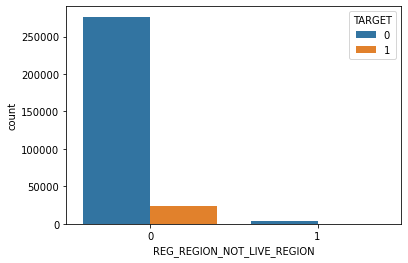

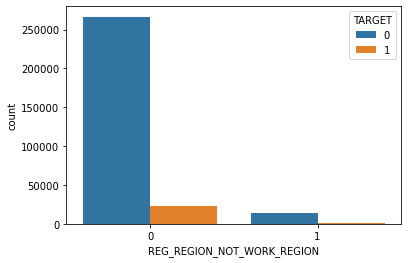

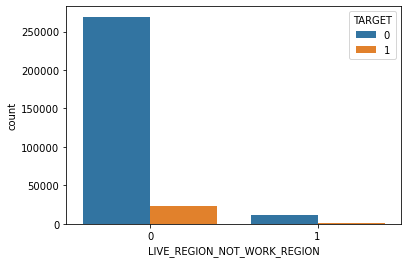

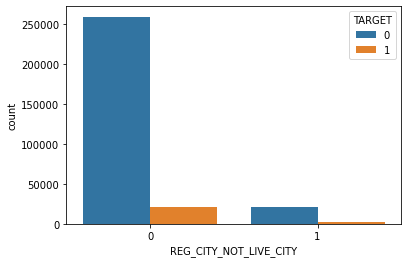

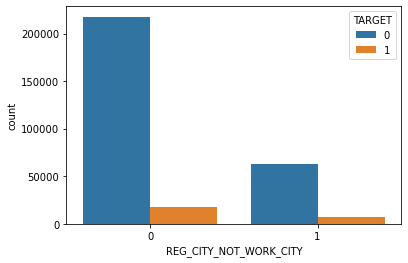

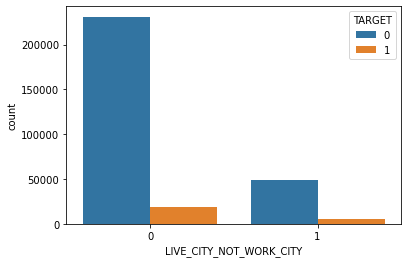

In [79]:
for i, predictor in enumerate(cdf.iloc[:,27:33]):# All rows, columns from 27th to 32nd
    plt.figure(i)
    sns.countplot(data=cdf, x=predictor, hue='TARGET')

## The above graphs show that the Defaulters:
## 1) All of them had given their mobile number and were reachable on the number provided.
## 2) 20% had given their home phone.
## 3) More than 90% had given their work(Employer) phone
## 4) Only around 10% had provided their email.
## 5) All the defaulters were contactable at all addresses (0=same) that they had submitted.

## Rating of the region where the defaulter lives:

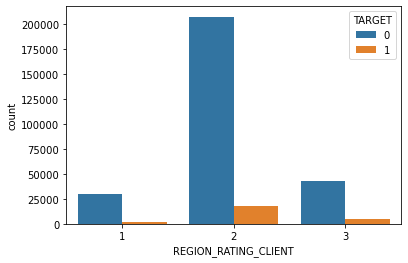

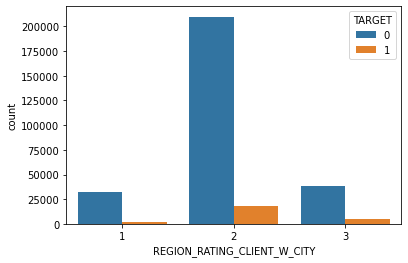

In [80]:
for i, predictor in enumerate(cdf.iloc[:,23:25]):# All rows, columns from 27th to 32nd
    plt.figure(i)
    sns.countplot(data=cdf, x=predictor, hue='TARGET')

## From the above graphs we can conclude that:
## 1) Defaulters were mostly from the Region Rating 2.

## Time of Application:

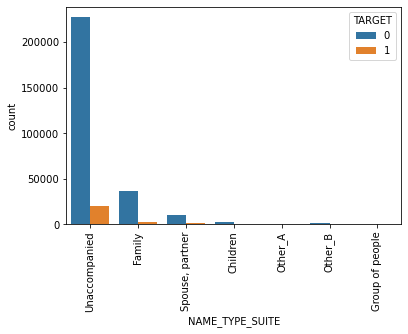

In [81]:
sns.countplot(data=cdf,x='NAME_TYPE_SUITE',hue='TARGET')
plt.xticks(rotation=90)
plt.show()

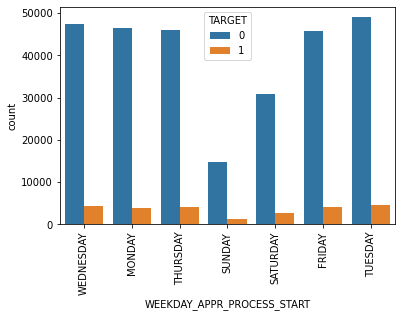

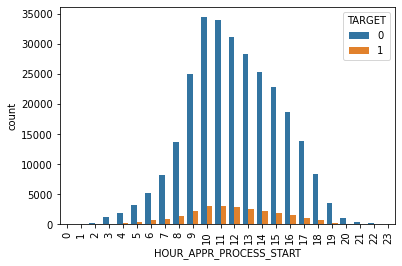

In [82]:
for i, predictor in enumerate(cdf.iloc[:,25:27]):# All rows, columns from 25th to 26th
    plt.figure(i)
    sns.countplot(data=cdf, x=predictor, hue='TARGET')
    plt.xticks(rotation=90)
    plt.show()
    

## From the above graphs we can conclude that defaulters:
## 1) were mostly unaccompanied at the time of applying for loan.
## 2) The weekdays were the time whent most of the loans were applied for.
## 3) The time of loan application was mostly between 9am - 3pm.

## Default past due date observations from earlier lenders.:

<AxesSubplot:>

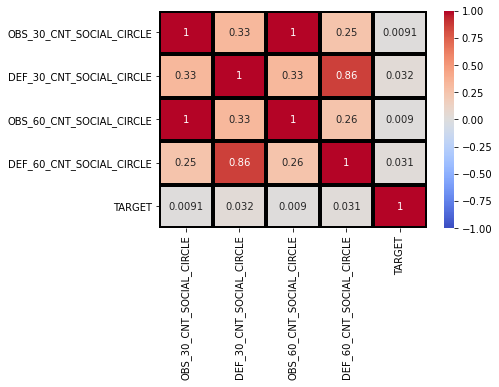

In [83]:
social_circle=cdf[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','TARGET']].copy()
sns.heatmap(social_circle.corr(),annot=True,vmin=-1, vmax=1, center= 0,cmap='coolwarm',linewidths=3,linecolor='black')

### The heatmap shows that OBS_30 AND OBS_60 HAVE CORR=1, WHICH MEANS THEY ARE SAME. SIMILARLY DEF_30 and DEF_60 are highly correlated 0.86.
 ### So checking the effect of any OBS_30 AND DEF_60 on Target Variable will be enough.
 ### Also here we can just check the effect on Target=1.

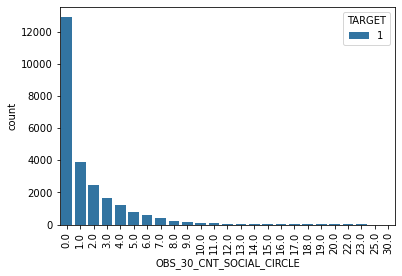

In [84]:
sns.countplot(x='OBS_30_CNT_SOCIAL_CIRCLE', hue='TARGET',data=ndf)
plt.xticks(rotation=90)
plt.show()
    

<AxesSubplot:xlabel='DEF_60_CNT_SOCIAL_CIRCLE', ylabel='count'>

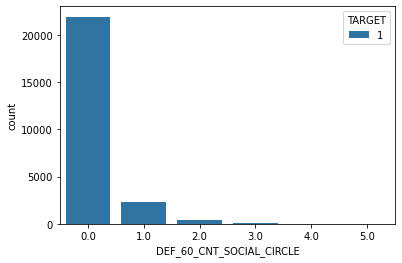

In [85]:
sns.countplot(x='DEF_60_CNT_SOCIAL_CIRCLE', hue='TARGET',data=ndf)

## From the above graphs we can conclude that the almost amongst the defaulters:-
## 1)80% of them have not defaulted the payment past 60 days 
## 2) Almost 50% of them have not defaulted for more than 30 days.

## Effect of Last time the defaulter changed his phone:

In [86]:
ndf['phone_change_time']=-ndf['DAYS_LAST_PHONE_CHANGE']/365

In [87]:
ndf['phone_change_time'].describe()

count    24719.000000
mean         2.216821
std          2.076291
min         -0.000000
25%          0.531507
50%          1.630137
75%          3.564384
max         11.150685
Name: phone_change_time, dtype: float64

In [88]:
ndf['phone_change_time_grp']=''
ndf.loc[(ndf['phone_change_time']<=1),'phone_change_time_grp']='[0-1]'
ndf.loc[(ndf['phone_change_time']>1) & (ndf['phone_change_time']<=3),'phone_change_time_grp']='[1-3]'
ndf.loc[(ndf['phone_change_time']>3) & (ndf['phone_change_time']<=5),'phone_change_time_grp']='[3-5]'
ndf.loc[(ndf['phone_change_time']>5) & (ndf['phone_change_time']<=7),'phone_change_time_grp']='[5-7]'
ndf.loc[(ndf['phone_change_time']>7) & (ndf['phone_change_time']<=9),'phone_change_time_grp']='[7-9]'
ndf.loc[(ndf['phone_change_time']>9) & (ndf['phone_change_time']<=11),'phone_change_time_grp']='[9-11]'
ndf.loc[(ndf['phone_change_time']>11) & (ndf['phone_change_time']<=12),'phone_change_time_grp']='[11-12]'


In [89]:
ndf.drop(columns=['phone_change_time','DAYS_LAST_PHONE_CHANGE'],inplace=True)

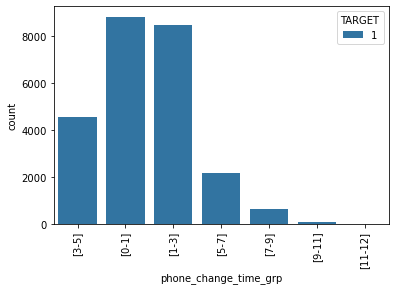

In [90]:
sns.countplot(data=ndf,x='phone_change_time_grp',hue='TARGET')
plt.xticks(rotation=90)
plt.show()

## The above graph shows that :
## 1) ALmost 60% of the defaulters have their phone changed 1-3 years before the application date and around 15% in 3-5 years.

## Document submission:

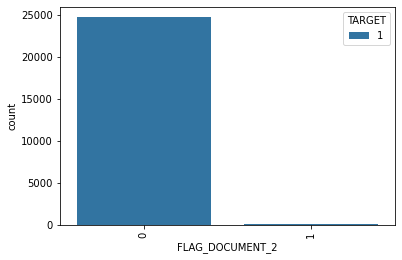

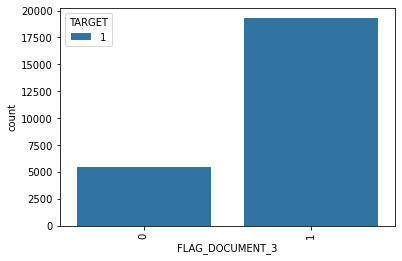

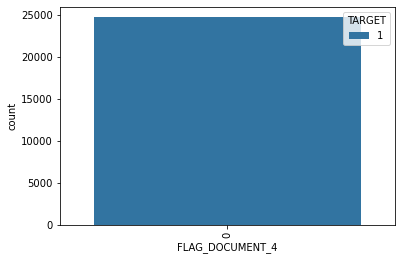

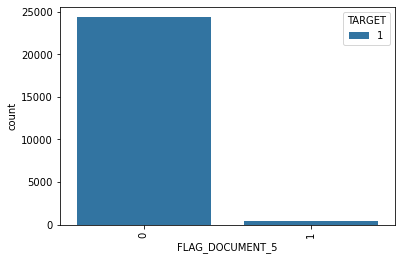

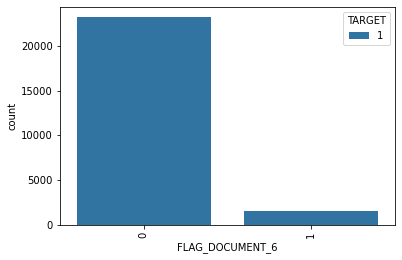

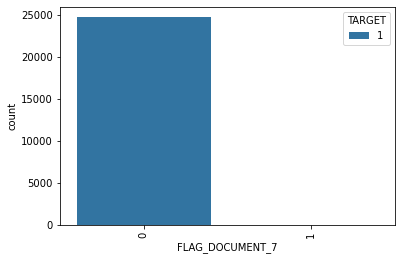

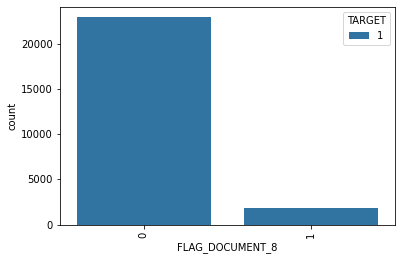

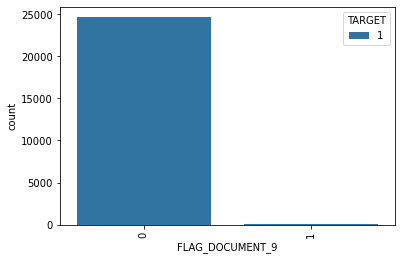

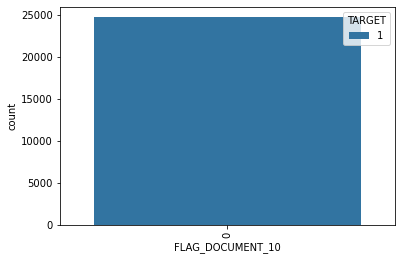

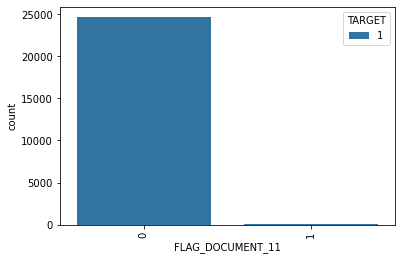

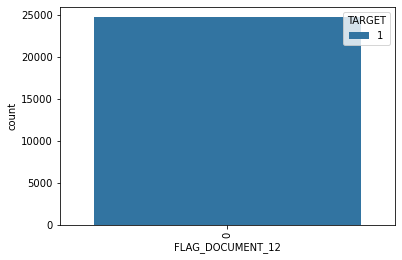

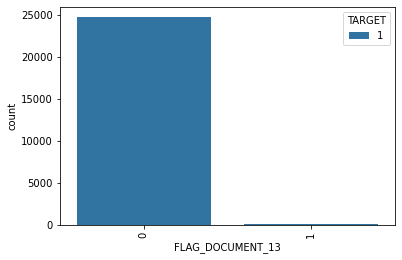

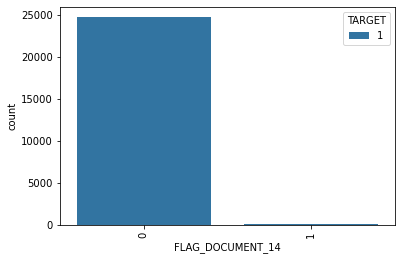

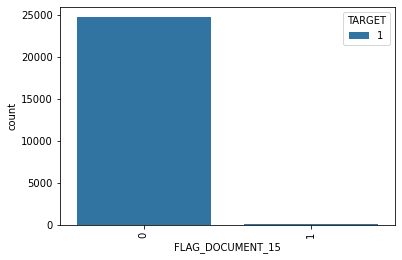

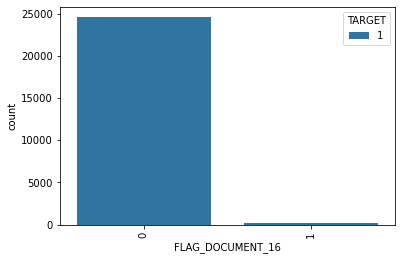

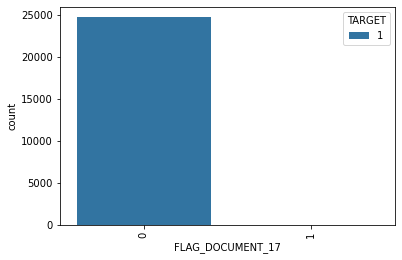

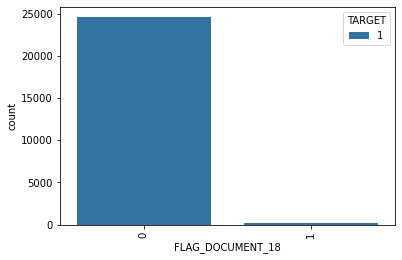

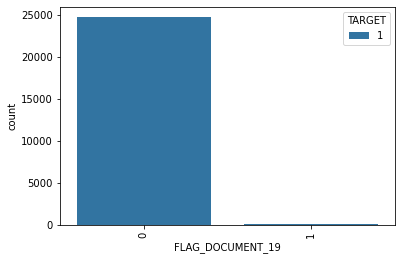

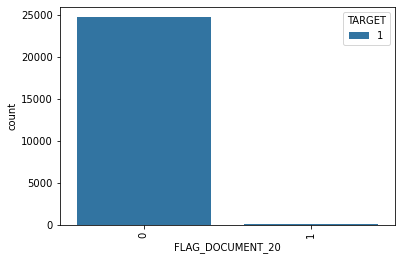

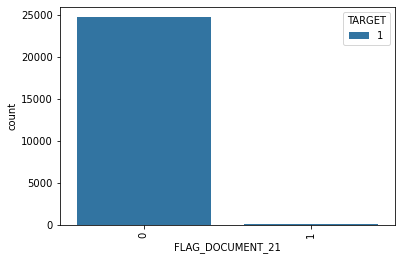

In [91]:
for i, predictor in enumerate(ndf.iloc[:,40:60]):# All rows, columns from 25th to 26th
    plt.figure(i)
    sns.countplot(data=ndf, x=predictor, hue='TARGET')
    plt.xticks(rotation=90)
    plt.show()

# Not getting an idea of the document status.

# Credit inquiries to the Bureau:

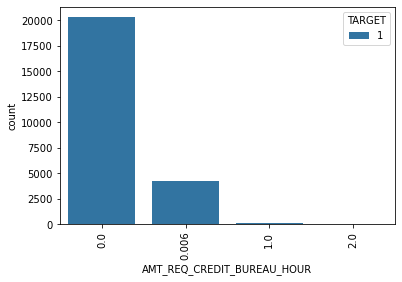

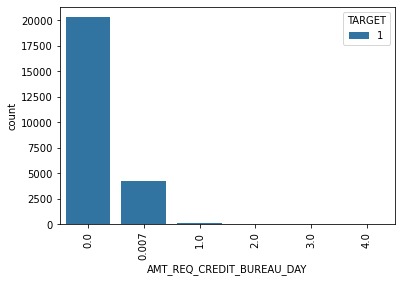

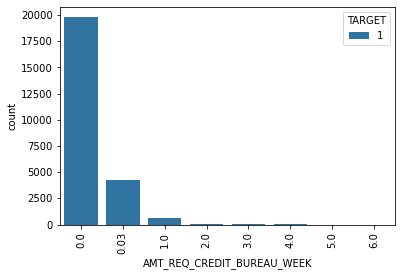

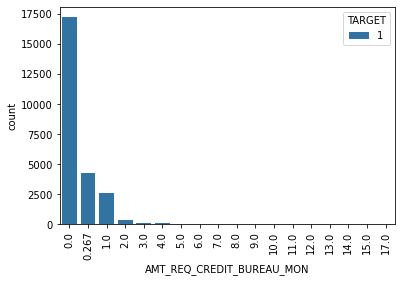

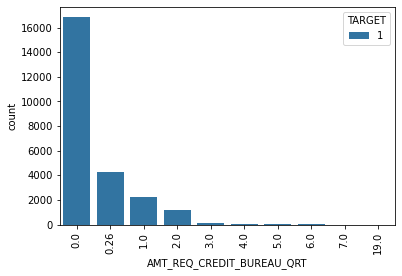

In [92]:
for i, predictor in enumerate(ndf.iloc[:,60:65]):# All rows, columns from 25th to 26th
    plt.figure(i)
    sns.countplot(data=ndf, x=predictor, hue='TARGET')
    plt.xticks(rotation=90)
    plt.show()

## From the above graph, it seems that the number of enquiries to the Bureau were almost 0 for the defaulters.